In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import math
import statsmodels.api as sm

In [2]:
iris = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/iris.txt", header = None)

In [3]:
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris.iloc[:, :4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: xlabel='petal_length', ylabel='petal_width'>

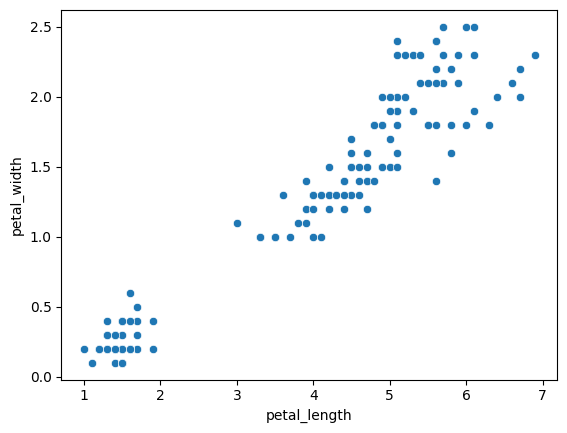

In [4]:
sns.scatterplot(iris, x = iris["petal_length"], y =iris["petal_width"])

In [5]:
b0 = np.linspace(-0.5, 0.4, 100)
b1 = np.linspace(0, 0.6, 100)
erro = 10000000
b0final = 0
b1final = 1
for i in b0:
  for j in b1:
    b = ((iris["petal_width"] -i - j*iris["petal_length"])**2).sum()
    if b < erro:
      erro = sum(iris["petal_width"] -i - j*iris["petal_length"])**2
      b0final = i
      b1final = j




In [6]:
b0final
b1final
erro

3.780078604224054

<Axes: xlabel='petal_length', ylabel='petal_width'>

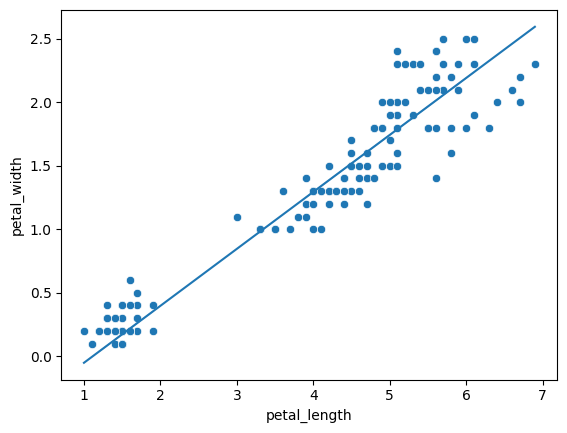

In [7]:
x = iris["petal_length"]
sns.scatterplot(iris, x = iris["petal_length"], y =iris["petal_width"])
sns.lineplot(x = x, y = b0final +b1final*x)

<Axes: xlabel='None', ylabel='Count'>

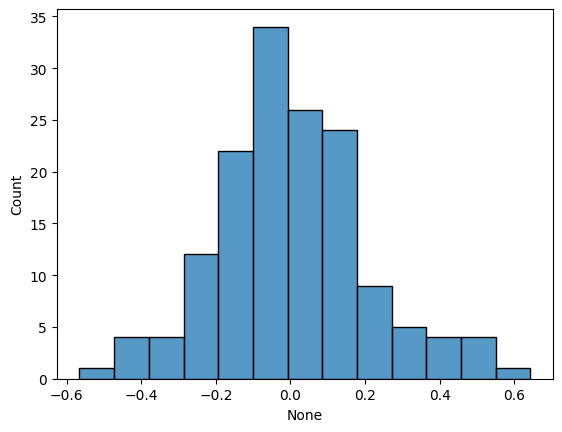

In [8]:
y =iris["petal_width"]
x = iris["petal_length"]
X = sm.add_constant(x)
results = sm.OLS(y, X).fit()
results.summary()
sns.histplot(x= results.resid)

<Axes: ylabel='None'>

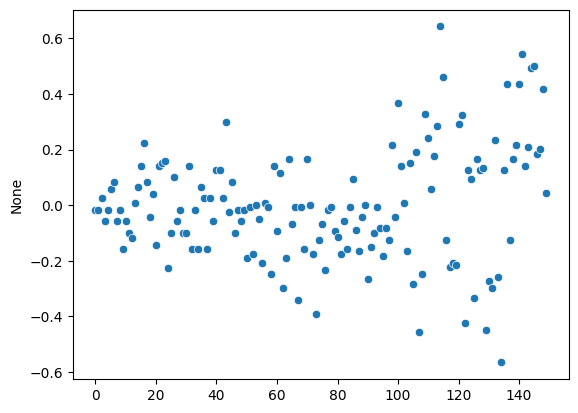

In [9]:
sns.scatterplot(x = list(range(len(y))), y = results.resid)